In [72]:
# Importing the libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import confusion_matrix, classification_report,r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline

In [73]:
from sqlalchemy import create_engine
import pandas as pd

# Create a connection to the database
# Read data
df = pd.read_csv("Salary Data.csv")
df.rename(columns={'Salary': 'salary', 'Education_Level': 'education_level', 'Gender' : 'gender', 'Years_Exp' : 'years_of_experience'}, inplace=True)

# Display the dataframe
print(df)


      Age  gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    salary                 Department  Seniority  
0                    5.0   90000.0  IT and Technical services        0.0  
1                    3.0   65000.

In [74]:
# Clean the data
df = df.dropna()

# Rename columns for clarity
df.rename(columns={
    'Years of Experience': 'Years_Exp',
    'Education Level': 'Education_Level',
    'Job Title': 'Job_Title'
}, inplace=True)

# Print the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())



Cleaned DataFrame:
    Age  gender Education_Level          Job_Title  Years_Exp    salary  \
0  32.0    Male      Bachelor's  Software Engineer        5.0   90000.0   
1  28.0  Female        Master's       Data Analyst        3.0   65000.0   
2  45.0    Male             PhD     Senior Manager       15.0  150000.0   
3  36.0  Female      Bachelor's    Sales Associate        7.0   60000.0   
4  52.0    Male        Master's           Director       20.0  200000.0   

                  Department  Seniority  
0  IT and Technical services        0.0  
1  IT and Technical services        0.0  
2      HR and Administration        0.0  
3                      Sales        0.0  
4      HR and Administration        0.0  


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              373 non-null    float64
 1   gender           373 non-null    object 
 2   Education_Level  373 non-null    object 
 3   Job_Title        373 non-null    object 
 4   Years_Exp        373 non-null    float64
 5   salary           373 non-null    float64
 6   Department       373 non-null    object 
 7   Seniority        373 non-null    float64
dtypes: float64(4), object(4)
memory usage: 26.2+ KB


Data Analysis

In [76]:
# Calculate the average salary
average_salary = df['salary'].mean()

# Print the average salary
print("\nAverage Annual Salary:", average_salary)


Average Annual Salary: 100577.34584450402


In [77]:
# Calculate the standard deviation of 'Annual_Salary'
salary_std_deviation = df['salary'].std()

# Print the standard deviation
print("\nStandard Deviation of Annual Salary:", salary_std_deviation)


Standard Deviation of Annual Salary: 48240.0134818827


In [78]:
# Calculate the average salary for the 'Male' category
average_salary_male = df[df['gender'] == 'Male']['salary'].mean()

# Print the average salary for Male
print("\nAverage Annual Salary for Male:", average_salary_male)


Average Annual Salary for Male: 103867.78350515464


In [79]:
# Calculate the average salary for the 'Female' category
average_salary_female = df[df['gender'] == 'Female']['salary'].mean()

# Print the average salary for Female
print("\nAverage annual Salary for Female:", average_salary_female)


Average annual Salary for Female: 97011.17318435754


In [80]:
# Calculate the average 'Annual_Salary' for each 'Education_Level' category
average_salary_by_education = df.groupby('Education_Level')['salary'].mean()
# Round the average salary to two decimal places
average_salary_by_education = average_salary_by_education.round(2)
# Print the average salary for each education level category
print("\nAverage  Annual Salary by Education Level:")
print(average_salary_by_education)


Average  Annual Salary by Education Level:
Education_Level
Bachelor's     74756.03
Master's      129795.92
PhD           157843.14
Name: salary, dtype: float64


In [81]:
# Calculate the average 'Annual_Salary' for each 'Education_Level' for Male and Female
average_salary_by_gender_education = df.groupby(['gender', 'Education_Level'])['salary'].mean()

# Display the results
print("Average Annual Salary for both Male and Female by Education Level:")
print(average_salary_by_gender_education)

Average Annual Salary for both Male and Female by Education Level:
gender  Education_Level
Female  Bachelor's          71019.417476
        Master's           120200.000000
        PhD                155384.615385
Male    Bachelor's          77936.776860
        Master's           139791.666667
        PhD                160400.000000
Name: salary, dtype: float64


In [82]:
# Calculate the average 'Annual_Salary' for each 'Education_Level' category
average_salary_by_education = df.groupby('Education_Level')['salary'].mean().round(2)

# Calculate the average 'Annual_Salary' for each combination of 'Gender' and 'Education_Level'
average_salary_by_gender_education = df.groupby(['gender', 'Education_Level'])['salary'].mean().round(2)

# Separate the data for Male and Female
male_data_df = df[df['gender'] == 'Male']
female_data_df = df[df['gender'] == 'Female']

# Create dynamic line graphs using plotly
fig = go.Figure()

# Plot the average salary by education level for Male employees
male_average_salary_by_education = male_data_df.groupby('Education_Level')['salary'].mean().round(2)
fig.add_trace(go.Scatter(x=male_average_salary_by_education.index,
                         y=male_average_salary_by_education.values,
                         mode='lines+markers',
                         name='Male',
                         line=dict(color='blue')))

# Plot the average salary by education level for Female employees
female_average_salary_by_education = female_data_df.groupby('Education_Level')['salary'].mean().round(2)
fig.add_trace(go.Scatter(x=female_average_salary_by_education.index,
                         y=female_average_salary_by_education.values,
                         mode='lines+markers',
                         name='Female',
                         line=dict(color='red')))

# Concatenate the data for 'Overall' (all genders) and plot
overall_average_salary_by_education = pd.concat([male_average_salary_by_education, female_average_salary_by_education])
overall_average_salary_by_education = overall_average_salary_by_education.groupby(level=0).mean().round(2)

fig.add_trace(go.Scatter(x=overall_average_salary_by_education.index,
                         y=overall_average_salary_by_education.values,
                         mode='lines+markers',
                         name='Overall (All Genders)',
                         line=dict(color='green', dash='dash')))  # Using 'dash' parameter to make it a dashed line

# Set the chart title and labels
fig.update_layout(title="Average Annual Salary by Education Level",
                  xaxis_title="Education Level",
                  yaxis_title="Average Annual Salary",
                  legend=dict(x=0.1, y=0.9),
                  width=800, height=500)

# Show the chart
fig.show()


In [83]:
# Calculate the average 'Annual_Salary' for each combination of 'Gender' and 'Years_Exp'
average_salary_by_gender_experience = df.groupby(['gender', 'Years_Exp'])['salary'].mean()

# Reset the index for plotting
average_salary_by_gender_experience = average_salary_by_gender_experience.reset_index()

# Round the average salary to two decimal places
average_salary_by_gender_experience['annual_salary'] = average_salary_by_gender_experience['salary'].round(2)

# Separate the data for Female and Male employees
female_data_df = average_salary_by_gender_experience[average_salary_by_gender_experience['gender'] == 'Female']
male_data_df = average_salary_by_gender_experience[average_salary_by_gender_experience['gender'] == 'Male']

# Check if data is available for Female and Male employees
if not female_data_df.empty:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=female_data_df['Years_Exp'], y=female_data_df['salary'],
                             mode='lines+markers', name='Female', line=dict(color='red')))

if not male_data_df.empty:
    fig.add_trace(go.Scatter(x=male_data_df['Years_Exp'], y=male_data_df['salary'],
                             mode='lines+markers', name='Male', line=dict(color='blue')))

# Plot the average salary for all employees (both genders)
average_salary_all_by_years_exp = df.groupby('Years_Exp')['salary'].mean().reset_index()
fig.add_trace(go.Scatter(x=average_salary_all_by_years_exp['Years_Exp'],
                         y=average_salary_all_by_years_exp['salary'],
                         mode='lines+markers', name='All', line=dict(color='green')))

# Set the chart title and labels
fig.update_layout(title="Average Annual Salary by Years of Experience",
                  xaxis_title="Years of Experience",
                  yaxis_title="Average Annual Salary",
                  legend=dict(x=0.1, y=0.9),
                  width=800, height=500)

# Show the chart
fig.show()

In [84]:
# Calculate the average 'Annual_Salary' for each 'Department' category
average_salary_by_department = df.groupby('Department')['salary'].mean()
# Round the average salary to two decimal places
average_salary_by_department = average_salary_by_department.round(2)
# Print the average salary for each education level category
print("\nAverage Salary by Department:")
print(average_salary_by_department)


Average Salary by Department:
Department
Accounts and Finance          89625.00
HR and Administration        112984.13
IT and Technical services    104823.01
Marketing and Creative        89090.91
Sales                         89107.14
Name: salary, dtype: float64


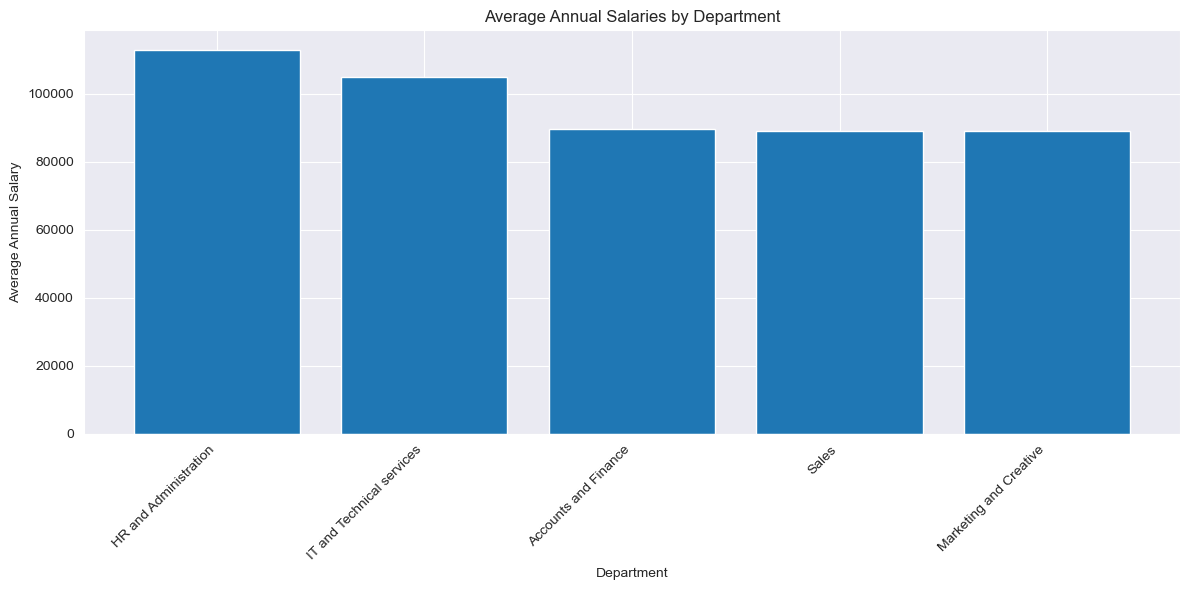

In [85]:
# Sort the average_salary_by_department in descending order
sorted_average_salary = average_salary_by_department.sort_values(ascending=False)

# Create a bar chart for the top 10 job titles
plt.figure(figsize=(12, 6))
plt.bar(sorted_average_salary.index, sorted_average_salary.values)
plt.xlabel('Department')
plt.ylabel('Average Annual Salary')
plt.title('Average Annual Salaries by Department')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility

# Show the chart
plt.tight_layout()
plt.show()

/var/folders/gz/yqwhjwdd6c75tl8kh7k5sr700000gn/T/ipykernel_33770/2913134591.py:2: UserWarning:

FixedFormatter should only be used together with FixedLocator



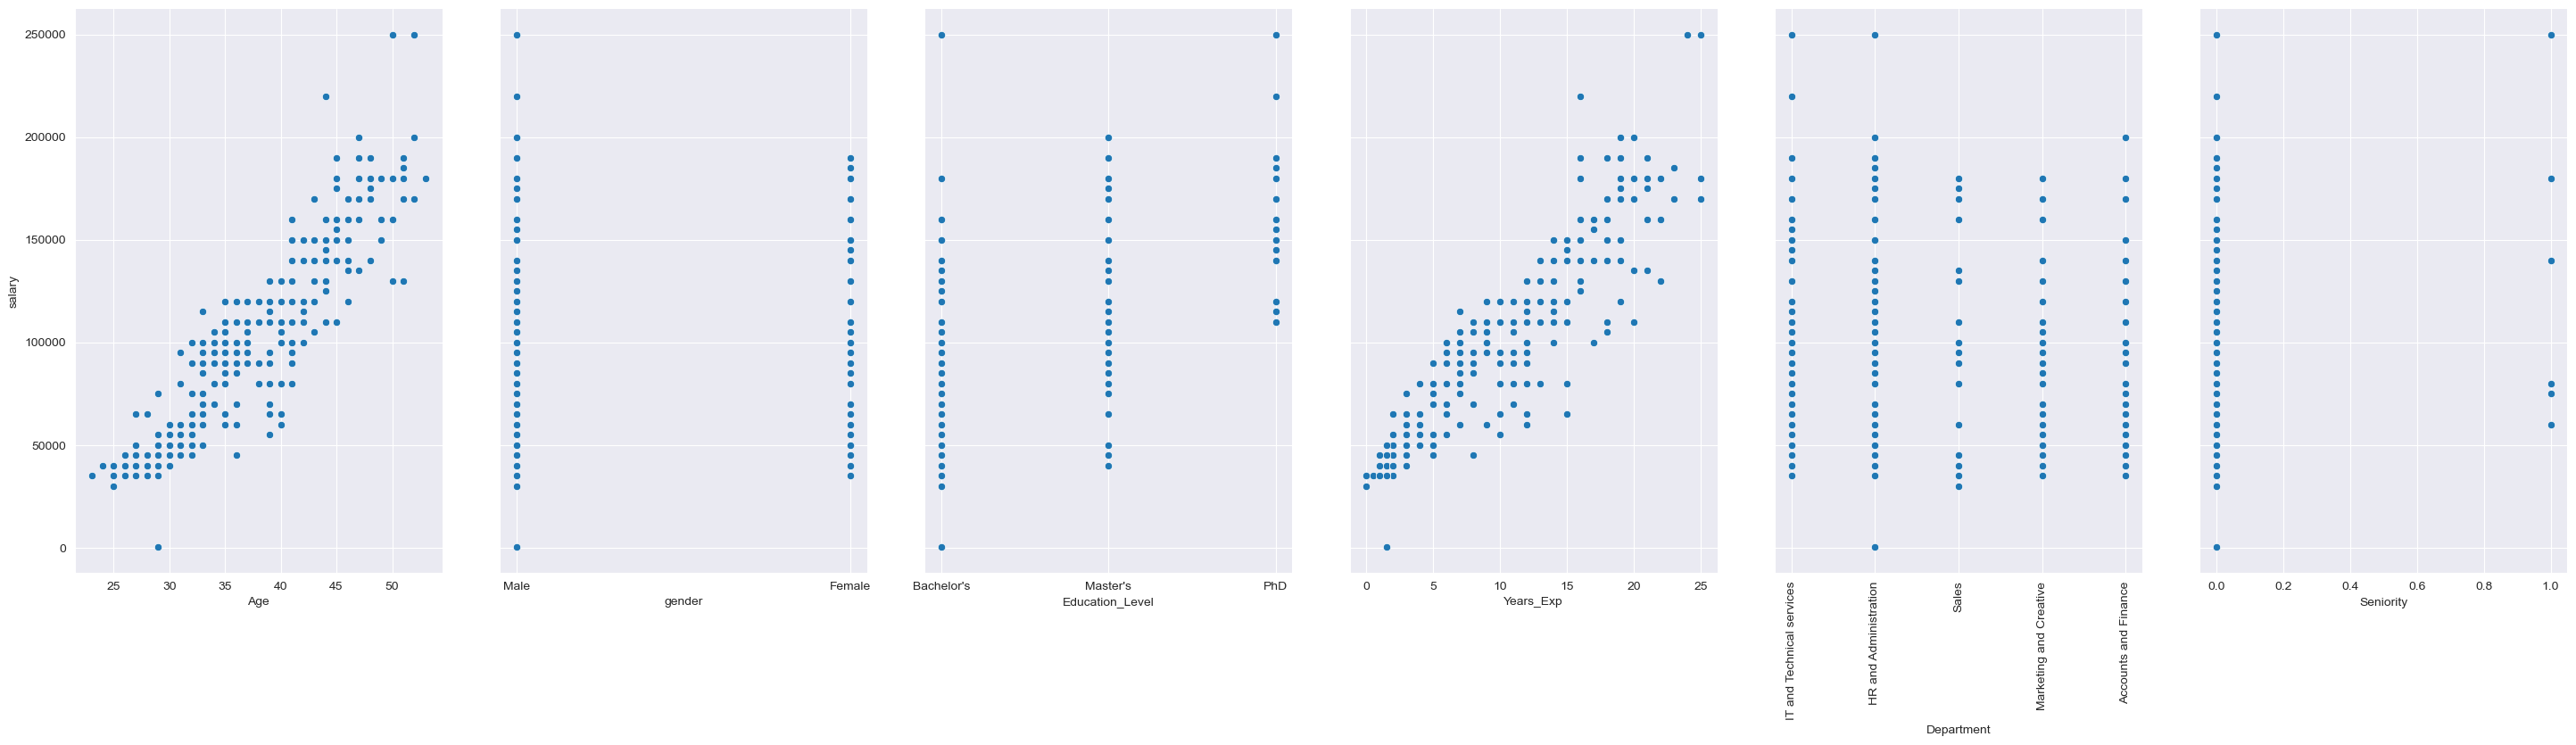

In [86]:
pairplot= sns.pairplot(df,x_vars=['Age','gender', 'Education_Level','Years_Exp','Department','Seniority'],y_vars='salary',height=7,aspect=0.7)
pairplot.axes[0, 4].set_xticklabels(pairplot.axes[0, 4].get_xticklabels(), rotation=90)
plt.show()

In [87]:
# One hot encoding for categorical variables that are nominal (Gender)
df= pd.get_dummies(df, columns=['gender'], drop_first=True)

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Department'] = label_encoder.fit_transform(df['Department'])

In [88]:
df.tail(10)

,Age,Education_Level,Job_Title,Years_Exp,salary,Department,Seniority,gender_Male
365,43.0,1,Director of Marketing,18.0,170000.0,3,0.0,1
366,31.0,0,Junior Financial Analyst,3.0,50000.0,0,0.0,0
367,41.0,0,Senior Product Manager,14.0,150000.0,1,0.0,1
368,44.0,2,Senior Data Engineer,16.0,160000.0,2,0.0,0
369,33.0,0,Junior Business Analyst,4.0,60000.0,2,0.0,1
370,35.0,0,Senior Marketing Analyst,8.0,85000.0,3,0.0,0
371,43.0,1,Director of Operations,19.0,170000.0,1,0.0,1
372,29.0,0,Junior Project Manager,2.0,40000.0,2,0.0,0
373,34.0,0,Senior Operations Coordinator,7.0,90000.0,1,0.0,1
374,44.0,2,Senior Business Analyst,15.0,150000.0,2,0.0,0


<AxesSubplot:>

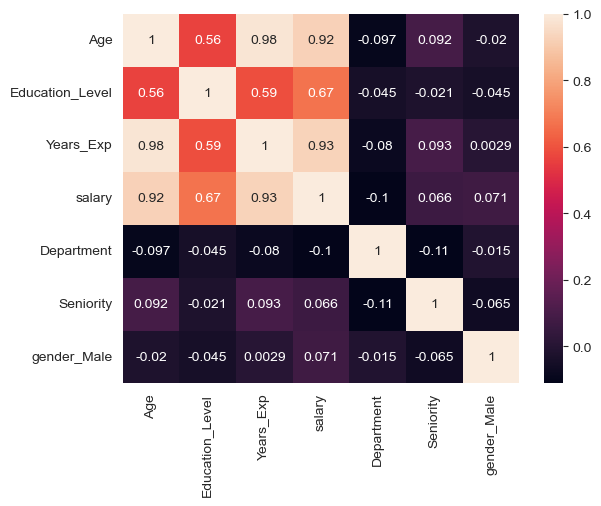

In [89]:
sns.heatmap(df.corr(),annot=True)

Machine Learning Model

In [90]:
#Logistic Reg + Over sampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Separate the y variable, the labels


y = df['Department']

# Separate the X variable, the features
X = df.drop(columns=['Age', 'Years_Exp','salary','Job_Title'])
X = pd.get_dummies(X)


# Perform oversampling
smote = SMOTE(random_state=0,sampling_strategy='auto', k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Instantiate the logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        24

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113


In [91]:
    # Prepare the Data

# Splitting the dataset into features and outcome variable (Salary)
x = df.drop(columns=['Age', 'gender_Male','salary','Job_Title'])
y = df['salary']

#x = df[['Age','Years_Exp','Seniority','Gender_Male','Department_HR and Administration','Department_IT and Technical services',\
#'Department_Marketing and Creative','Department_Sales','education_level_encoded']].values

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
## Training the multiple linear regression on the training set
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

## Predicting test results
y_pred_linear = regressor_MultiLinear.predict(x_test)

# Accuracy

# Calculating r2 score
r2_MultiLinear = r2_score(y_test,y_pred_linear)
print(f"The R2 score for the Multi Linear Regression model is {r2_MultiLinear:.4f}")

# Calculate the Mean Squared Error (MSE)
mse_multilinear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error:", mse_multilinear)

The R2 score for the Multi Linear Regression model is 0.9027
Mean Squared Error: 233355401.45166144


In [93]:
print (x_test)

     Education_Level  Years_Exp  Department  Seniority
329                1       21.0           3        0.0
33                 0       10.0           3        0.0
15                 0       16.0           1        0.0
316                1        6.0           0        0.0
57                 2       17.0           2        0.0
..               ...        ...         ...        ...
94                 0        7.0           2        0.0
196                0       11.0           3        0.0
313                0        4.0           2        0.0
294                1       14.0           1        0.0
349                0        8.0           3        0.0

[75 rows x 4 columns]


In [94]:
# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(random_state=42)
y_train = y_train.ravel()

# Fit the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred_randf = rf_regressor.predict(x_test)

# Calculating r2 score
r2_randf = r2_score(y_test,y_pred_randf)
print(f"The R2 score for the Random Forest Regressor model is {r2_randf:.4f}")

# Calculate the Mean Squared Error (MSE)
mse_randf = mean_squared_error(y_test, y_pred_randf)
print("Mean Squared Error:", mse_randf)

The R2 score for the Random Forest Regressor model is 0.8463
Mean Squared Error: 368558692.25374043


Visualize Predictions

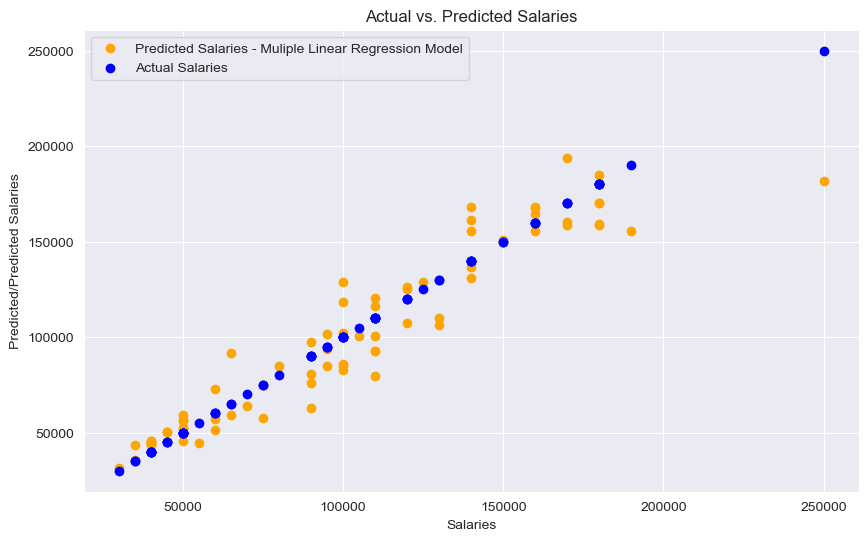

In [95]:
# Visualize Predictions for Muliple Linear Regression Model
plt.figure(figsize=(10, 6))

# Scatter plot for predicted salaries (orange color)
plt.scatter(y_test, y_pred_linear, color='orange', label='Predicted Salaries - Muliple Linear Regression Model')

# Scatter plot for actual salaries (ble color)
plt.scatter(y_test, y_test, color='blue', label='Actual Salaries')

plt.xlabel('Salaries')
plt.ylabel('Predicted/Predicted Salaries')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

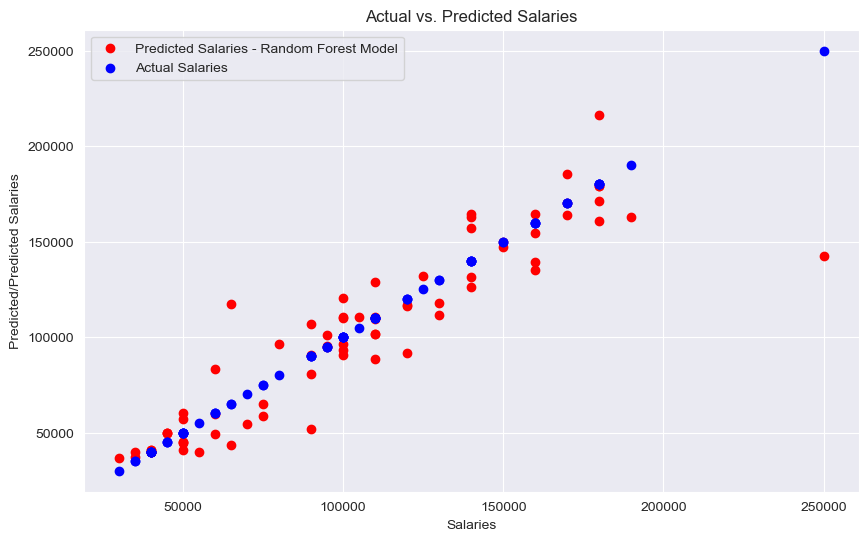

In [96]:
# Visualize Predictions for Muliple Linear Regression Model
plt.figure(figsize=(10, 6))

# Scatter plot for predicted salaries (red color)
plt.scatter(y_test, y_pred_randf, color='red', label='Predicted Salaries - Random Forest Model')

# Scatter plot for actual salaries (ble color)
plt.scatter(y_test, y_test, color='blue', label='Actual Salaries')

plt.xlabel('Salaries')
plt.ylabel('Predicted/Predicted Salaries')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

Feature importance

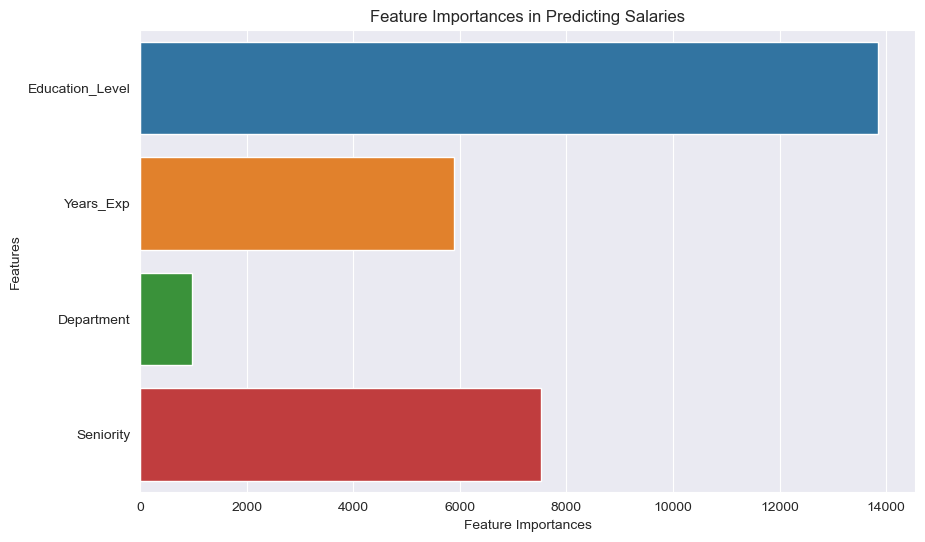

In [97]:
# Analyze Feature Importances for Mulitple Linear Regression Model
feature_importances = abs(regressor_MultiLinear.coef_)
feature_names = x.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances in Predicting Salaries')
plt.show()

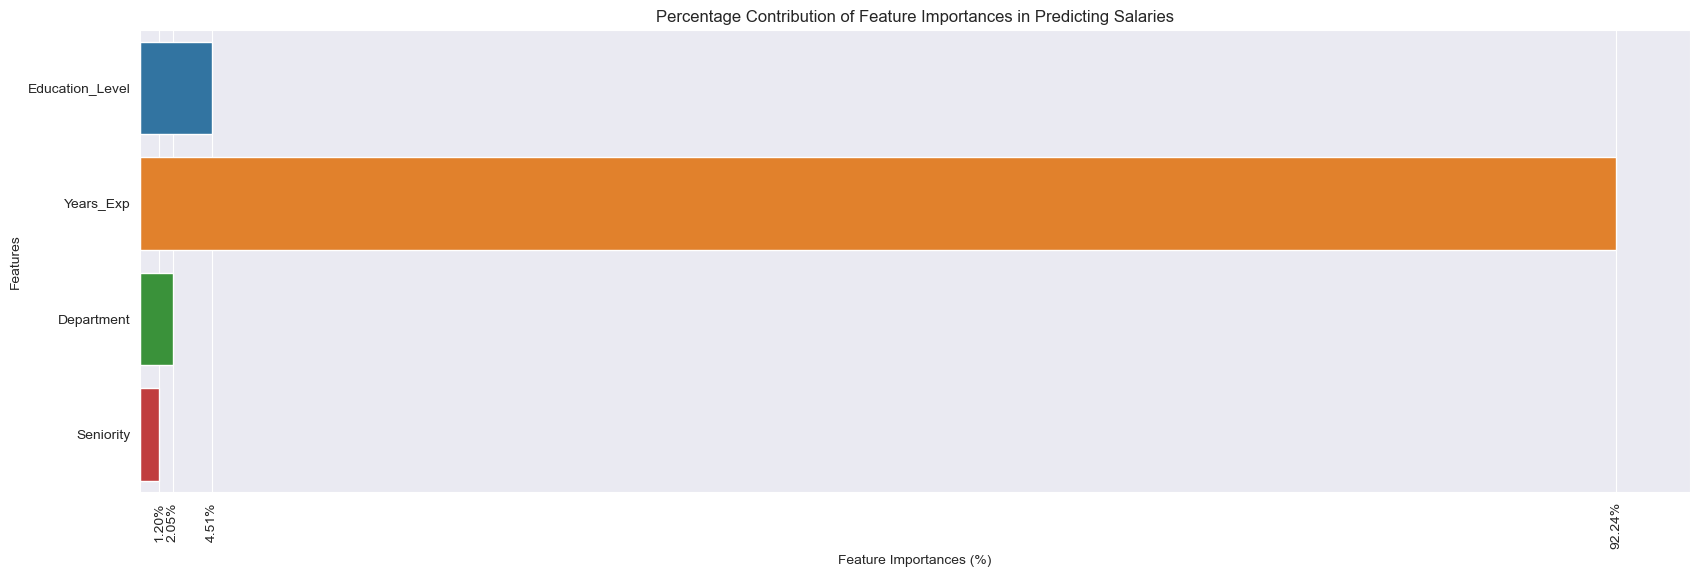

In [98]:
#Feature Importances
feature_importances = rf_regressor.feature_importances_
feature_names = x.columns
# Calculate feature importances as percentages
total_importance = np.sum(feature_importances)
feature_importances_percentage = (feature_importances / total_importance) * 100
# Create a bar plot
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=feature_importances_percentage, y=feature_names)
plt.xlabel('Feature Importances (%)')
plt.ylabel('Features')
plt.title('Percentage Contribution of Feature Importances in Predicting Salaries')
# Set x-axis ticks to be percentage values
ax.set_xticks(feature_importances_percentage)
plt.xticks(rotation =90)
ax.set_xticklabels(["{:.2f}%".format(val) for val in feature_importances_percentage])
plt.show()

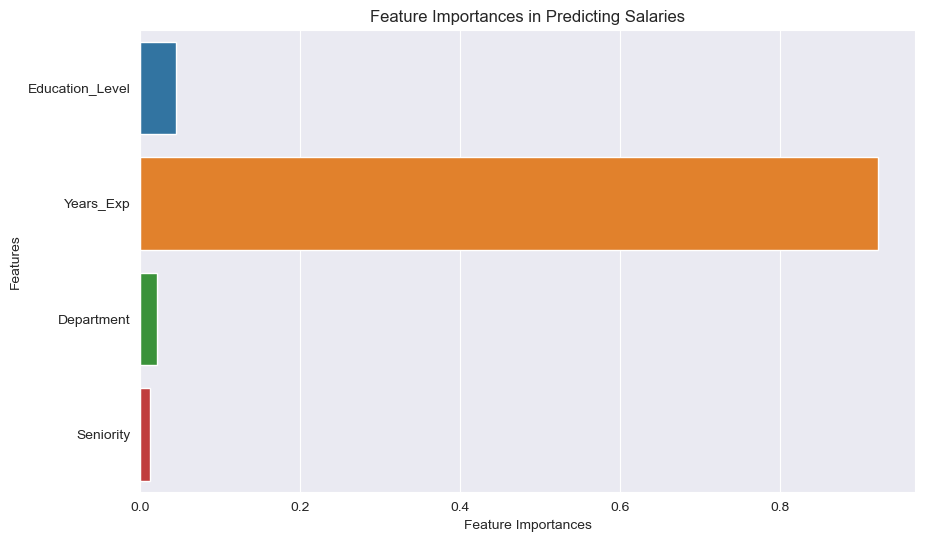

In [99]:
# Analyze Feature Importances for Random Forest Model
feature_importances = rf_regressor.feature_importances_
feature_names = x.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Feature Importances in Predicting Salaries')
plt.show()

Hyperparameter Tuning

In [100]:
# Define the hyperparameter grid for grid search
param_grid = {
    # LinearRegression has no hyperparameters to tune
}

# Create a LinearRegression instance
regressor_MultiLinear = LinearRegression()

# Create a GridSearchCV instance
grid_search = GridSearchCV(regressor_MultiLinear, param_grid, cv=5, scoring='r2')

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best model found by grid search
best_lr_regressor = grid_search.best_estimator_

# Use the best model found by grid search for predictions on test data
y_test_predictions = best_lr_regressor.predict(x_test)

# Calculate the R2 score on testing data using the best model
r2_test = r2_score(y_test, y_test_predictions)
print("R-squared (R2) score on testing data with best model:", r2_test)


R-squared (R2) score on testing data with best model: 0.9026705323017562


In [101]:
grid_search

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={}, scoring='r2')

In [102]:
# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2')

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model found by grid search for predictions on test data
best_rf_regressor = grid_search.best_estimator_
y_test_predictions = best_rf_regressor.predict(x_test)

# Calculate the R2 score on testing data using the best model
r2_test = r2_score(y_test, y_test_predictions)
print("R-squared (R2) score on testing data with best model:", r2_test)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 50}
R-squared (R2) score on testing data with best model: 0.8428529380569051


In [103]:
#DO NOT TOUCH RHE BELOW CODE!!!

In [104]:
def get_user_input():
    def get_integer_input(prompt):
        while True:
            try:
                value = int(input(prompt))
                return value
            except ValueError:
                print("Please enter a valid integer.")
    def get_valid_education_input():
        while True:
            education = input("What is your level of education? (Bachelor, Master, PhD): ").strip().capitalize()
            if education in ["Bachelor", "Master", "Phd"]:
                return {"Bachelor": 0, "Master": 1, "Phd": 2}[education]
            else:
                print("Please enter 'Bachelor', 'Master', or 'PhD'.")
    def get_valid_senior_position_input():
        while True:
            position = input("Are you in a senior position? (Yes or No): ").strip().capitalize()
            if position in ["Yes", "No"]:
                return 1 if position == "Yes" else 0
            else:
                print("Please enter 'Yes' or 'No'.")
    def get_department_input():
        departments = [
            "Accounts and Finance"
            "HR and Administration",
            "IT and Technical services",
            "Marketing and Creative",
            "Sales"
        ]
        while True:
            choice = input("Select your department (0-4): Accounts and Finance (0), HR and Administration (1), IT and Technical services (2), Marketing and Creative (3), Sales (4)")
            if choice.isdigit() and 0 <= int(choice) <= len(departments):
                return int(choice)
            else:
                print("Please enter a valid department number (0-4).")
    experience = get_integer_input("How many years of experience do you have? ")
    education = get_valid_education_input()
    senior_position = get_valid_senior_position_input()
    department = int(get_department_input())
    return [experience, senior_position, education, department]
if __name__ == "__main__":
    user_info = get_user_input()
    y_pred = best_lr_regressor.predict([user_info])
    print("For a worker with the below demographic factors;")
    print("Years of Experience: ", user_info[0])
    print("Education Level (Bachelor: 0, Master: 1, PhD: 2):", user_info[1])
    print("Senior position (Yes: 1, No: 0):", user_info[2])
    print("Department (Accounts and Finance (0), HR and Administration (1), IT and Technical services (2), Marketing and Creative (3), Sales (4)):", user_info[3])
    print(f"The expected salary is ${y_pred[0]:.2f}")

Please enter a valid integer.
For a worker with the below demographic factors;
Years of Experience:  1
Education Level (Bachelor: 0, Master: 1, PhD: 2): 1
Senior position (Yes: 1, No: 0): 2
Department (Accounts and Finance (0), HR and Administration (1), IT and Technical services (2), Marketing and Creative (3), Sales (4)): 0
The expected salary is $53383.37


/Users/nghiadoanhieu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

